# DRAGON REAL ESTATE - PRICE PREDICTOR

Importing and studying of data

In [1]:
import pandas as pd
housing = pd.read_csv('data.csv')
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
3,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
4,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [2]:
housing.info()#it gives you the information of number of entries of every column and the type of data present in it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [3]:
housing.describe()
#using the describe function we get the frequency count, mean, standard division, minimum, maximum and the other information
#about columnwise data
#also we come to know that some of the values of the RM is missing as it has only 501 values instead of 506==> so we will 
#fill it later

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613057,11.552372,11.107747,0.069170,0.555470,6.288653,68.626087,3.776977,9.525692,408.859684,18.425692,356.694625,12.634881,22.466601
std,8.601740,23.305435,6.886659,0.253994,0.115516,0.699020,28.116405,2.095847,8.727125,167.987582,2.186632,91.303615,7.149787,9.145147
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.130000,0.000000,0.449000,5.888000,45.025000,2.100175,4.000000,281.000000,17.000000,375.377500,6.905000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.211000,77.150000,3.207450,5.000000,330.000000,19.050000,391.440000,11.330000,21.200000
75%,3.677082,18.000000,18.100000,0.000000,0.624000,6.618000,94.075000,5.116700,24.000000,666.000000,20.200000,396.322500,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
housing['B'].value_counts()#using .value_counts() we come to know the frequency of every value in that column
#for example 'B' ==> we have 125 values for 396.90==> that is quite biased data

396.90    125
393.74      3
395.24      3
376.14      2
393.23      2
         ... 
394.46      1
288.99      1
390.30      1
248.31      1
390.50      1
Name: B, Length: 355, dtype: int64

In [5]:
housing['CHAS'].value_counts()
#'CHAS' has 471 1s ==> so we will split our data on the basis of 'CHAS' feature ==> so that biasing is minimum

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing['AGE'].value_counts()
#many houses ore 100 years old

100.0    43
65.2      8
97.9      4
96.0      4
98.8      4
         ..
58.7      1
97.7      1
96.8      1
47.6      1
96.4      1
Name: AGE, Length: 352, dtype: int64

Plotting of Data ==> for better understanding

In [7]:
%matplotlib inline
#so that the plotting is done in this notebook only

array([[<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'B'}>,
        <AxesSubplot:title={'center':'CHAS'}>,
        <AxesSubplot:title={'center':'CRIM'}>],
       [<AxesSubplot:title={'center':'DIS'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'RM'}>],
       [<AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'ZN'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

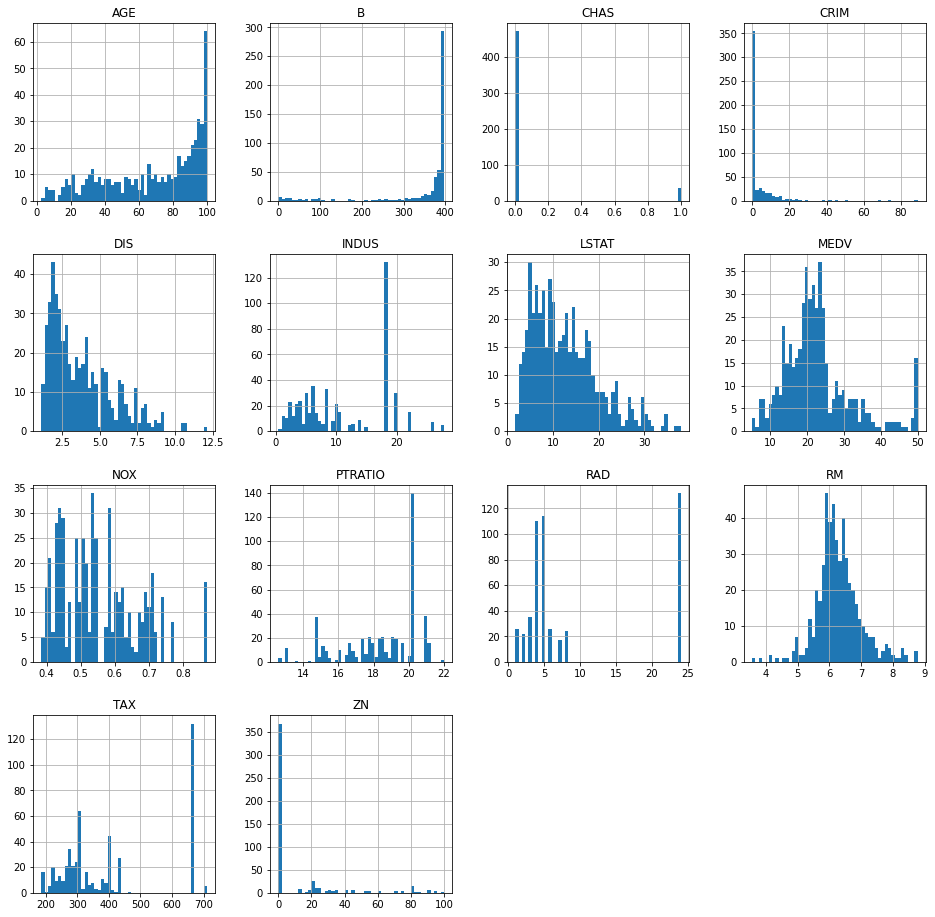

In [8]:
from matplotlib import pyplot as plt
housing.hist(bins=50, figsize=(16,16))
#bins are basically the number of ranges in which the data is ditributed

Train-Test Spilliting

In [9]:
#we will study basically three ways to split the data 

In [10]:
# 1. we will use the train-test split function from the sklearn library
from sklearn.model_selection import train_test_split
train_set, test_set= train_test_split(housing, test_size=0.2, random_state=42)
#this function randomly distributes the data into train test data where test_size 0.2 defines that 20% of data is present in the
#test set and random state stops the function to split the data again and again we run this function==> ie it only runs once

In [11]:
# 2. giving you the insight of the above function
import numpy as np
def train_test_split(data, test_ratio):
    np.random.seed(42)#will make the randomisation work only once
    shuffled= np.random.permutation(len(data))#will make a random array of indices of the data
    test_size= int(len(data)*test_ratio)
    test_indices=data[:test_size]
    train_indices=data[test_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
# ==> so basically this happens in that sklearn train test split

PROBLEM FACED DURING SPLITTING OF DATA

In [12]:
# now if we look at the data closely we notice that CHAS feature has only two types of values which 0s and 1s. Also there are
# 471 0s and only 35 1s in this feature. So when we split the data there is a chance that the test data gets filled with only 1s
# so it will create an issue during the testing.
# So we need to split the data in such a manner that the ratio of 0s and 1s in the test and the train data remains equal
#==> there is a function for that kind of splitting

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
stra_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in stra_split.split(housing, housing['CHAS']):
    stra_train_index=housing.loc[train_index]
    stra_test_index=housing.loc[test_index]
#now test and train data is splitted properly

In [14]:
housing = stra_train_index.copy()
#now housing is our training data and we will not touch our test data

Correlations among the properties and with the label

In [15]:
#correlation between any two things tells you whether there is an inverse or direct relation between them
#like if it is +0.7 its means it has strong direct relation between the variables
#similarly -0.5 means moderate inverse relation between the variables
cor_matrix = housing.corr()
cor_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.216884,0.416910,-0.061462,0.429323,-0.248316,0.360845,-0.384838,0.647921,0.604397,0.308901,-0.486945,0.472043,-0.392231
ZN,-0.216884,1.000000,-0.551424,-0.025917,-0.516119,0.299307,-0.569760,0.676545,-0.313604,-0.332189,-0.392238,0.192481,-0.430120,0.348602
INDUS,0.416910,-0.551424,1.000000,0.044516,0.751933,-0.378001,0.638897,-0.700146,0.584033,0.714209,0.401783,-0.369305,0.613073,-0.464912
CHAS,-0.061462,-0.025917,0.044516,1.000000,0.075879,0.099597,0.057518,-0.085914,-0.022094,-0.050024,-0.127340,0.048196,-0.077088,0.209087
NOX,0.429323,-0.516119,0.751933,0.075879,1.000000,-0.297877,0.726837,-0.762126,0.591632,0.655481,0.166045,-0.406868,0.596839,-0.417973
RM,-0.248316,0.299307,-0.378001,0.099597,-0.297877,1.000000,-0.234432,0.197780,-0.190104,-0.272447,-0.333195,0.106527,-0.591176,0.679283
AGE,0.360845,-0.569760,0.638897,0.057518,0.726837,-0.234432,1.000000,-0.735017,0.446594,0.499436,0.259721,-0.286786,0.595658,-0.362016
DIS,-0.384838,0.676545,-0.700146,-0.085914,-0.762126,0.197780,-0.735017,1.000000,-0.476339,-0.525057,-0.214462,0.306770,-0.494994,0.232671
RAD,0.647921,-0.313604,0.584033,-0.022094,0.591632,-0.190104,0.446594,-0.476339,1.000000,0.910796,0.481856,-0.491219,0.482455,-0.369068
TAX,0.604397,-0.332189,0.714209,-0.050024,0.655481,-0.272447,0.499436,-0.525057,0.910796,1.000000,0.480301,-0.475445,0.532376,-0.450141


In [16]:
cor_matrix['MEDV'].sort_values(ascending=False)
#it shows that RM and Lstat are the most important features 

MEDV       1.000000
RM         0.679283
B          0.360146
ZN         0.348602
DIS        0.232671
CHAS       0.209087
AGE       -0.362016
RAD       -0.369068
CRIM      -0.392231
NOX       -0.417973
TAX       -0.450141
INDUS     -0.464912
PTRATIO   -0.494524
LSTAT     -0.734086
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='CHAS', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='CHAS', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='CHAS'>,
        <AxesSubplot:xlabel='RM', ylabel='CHAS'>,
        <AxesSubplot:xlabel='CHAS', ylabel='CHAS'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='CHAS'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='CHAS', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

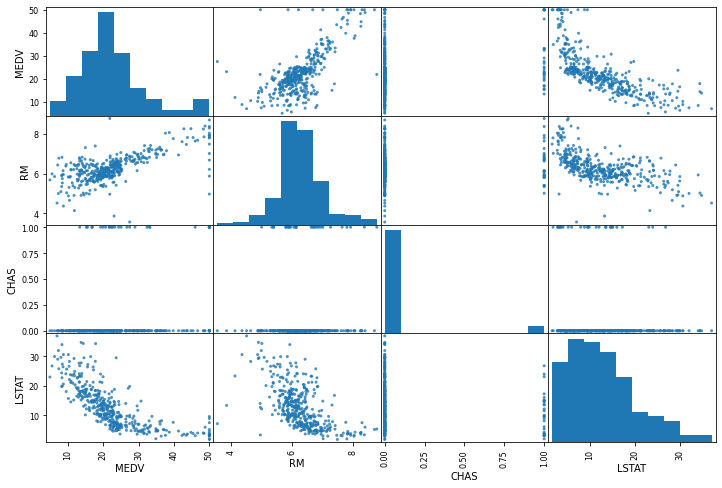

In [17]:
#now we will plot to understand the relation between the data
from pandas.plotting import scatter_matrix
from matplotlib import cm
cmap=cm.get_cmap('gnuplot')
attributes=['MEDV', 'RM', 'CHAS', 'LSTAT']
scatter_matrix(housing[attributes], figsize=(12,8), alpha=0.8, cmap=cmap)
#so you understand the relation between the label and the other features

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

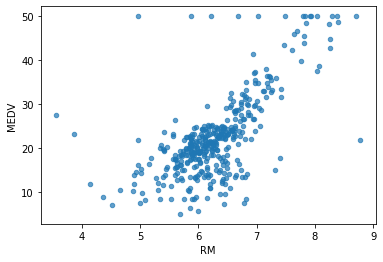

In [18]:
housing.plot(kind='scatter', x="RM", y="MEDV", alpha=0.7)
#as we observed the other points that are moving away from the basic relation can be removed to make ML model precised

Adding a new property and understanding its importance

In [19]:
housing['TAXRM']= housing['TAX']/housing['RM']
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending= False)

MEDV       1.000000
RM         0.679283
B          0.360146
ZN         0.348602
DIS        0.232671
CHAS       0.209087
AGE       -0.362016
RAD       -0.369068
CRIM      -0.392231
NOX       -0.417973
TAX       -0.450141
INDUS     -0.464912
PTRATIO   -0.494524
TAXRM     -0.521011
LSTAT     -0.734086
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

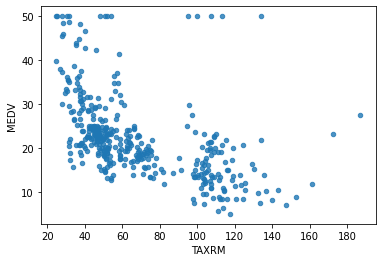

In [20]:
housing.plot(kind='scatter', x='TAXRM', y='MEDV', alpha=0.8)
#so taxrm is a strong feature

In [21]:
#dividing the labels and the features
housing_labels=housing['MEDV']
housing=housing.drop('MEDV',axis=1)
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,45.468948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,65.507152
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,109.126659
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,35.294118
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,102.068966


FILLING OF MISSING ATTRIBUTES 

In [22]:
#Now as we noticed that there are missing features in RM ==> we will fill them
#suppose there are some missing attributes in the data... then how will you deal with it...
# 1. get rid of all those missing data points
# 2. get rid of that attribute or that column only
# 3. set that data points to some value(0, mean or median(of that column))

In [23]:
# now to apply option 1
a = housing.dropna(subset=['RM'])#now suppose some data points were missing from the RM column
#so this code will remove all those data points and will also remove all the data points from other columns corresponding to those
#missing data points
a.shape
#note that original one has not been removed because we didn't use emplace=TRUE in the code

(399, 14)

In [24]:
housing.drop("RM", axis=1)#now the "RM" column has been removed
#note that original one has not been removed because we didn't use emplace=TRUE in the code

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAXRM
254,0.04819,80.0,3.64,0,0.392,32.0,9.2203,1,315,16.4,392.89,6.57,51.571709
348,0.01501,80.0,2.01,0,0.435,29.7,8.3440,4,280,17.0,390.94,5.99,42.200452
476,4.87141,0.0,18.10,0,0.614,93.6,2.3053,24,666,20.2,396.21,18.68,102.714374
321,0.18159,0.0,7.38,0,0.493,54.3,4.5404,5,287,19.6,396.90,6.87,45.012547
326,0.30347,0.0,7.38,0,0.493,28.9,5.4159,5,287,19.6,396.90,6.15,45.468948
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,82.6,1.7455,5,403,14.7,88.01,15.02,65.507152
423,7.05042,0.0,18.10,0,0.614,85.1,2.0218,24,666,20.2,2.52,23.29,109.126659
98,0.08187,0.0,2.89,0,0.445,36.9,3.4952,2,276,18.0,393.53,3.57,35.294118
455,4.75237,0.0,18.10,0,0.713,86.5,2.4358,24,666,20.2,50.92,18.13,102.068966


IMPUTER

In [25]:
#the imputer object will fill all the NA values in the data with the median of that column data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
new= imputer.fit_transform(housing)
housing_new= pd.DataFrame(new, columns=housing.columns)
housing_new.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602281,11.028465,11.320371,0.069307,0.558863,6.283698,69.137871,3.725754,9.707921,412.987624,18.442079,353.418614,12.779134,67.092226
std,8.099619,22.137705,6.900431,0.254290,0.116478,0.704200,28.220184,2.086934,8.754373,168.079688,2.151637,96.080538,7.238815,30.986415
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,24.645639
25%,0.086097,0.000000,5.190000,0.000000,0.453000,5.884750,44.850000,2.035975,4.000000,286.250000,17.225000,374.617500,6.772500,45.019011
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.219000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.490000,53.867403
75%,3.731923,18.000000,18.100000,0.000000,0.631000,6.626000,94.100000,4.812200,24.000000,666.000000,20.200000,395.755000,17.102500,97.500306
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,187.026116


Scikit Learn Design

In [26]:
# Basically 3 types of objects
#which means this library works on these 3 types of things only
# 1. Estimators ==> they estimates some parameters... or learn from data... it fits and learn from the data
# it has mainly fit method that fits on the data and compute the internal parameters

# 2. Tranformers now this will take input and compute the output based on the learnings it got from the fit function...
# now there is a convience function fir_transform() that does both the fitting as well as transforming work...

# 3. Predictors - LinearRegresion is a kind of predictor... same like knn algo...it uses the fit() function and then the predict()
# function to predict the values... also it has score() function that computes the accuracy of the algorithm that we used

#that's the basic design of scikit learn module..
#so estimator fits the data and estimates parameters, transfromers fit the data and transforms the data on the basis of parameters
#and predictors fits the data, studies it and then predicts the data

Feature Scaling

In [27]:
#the ML algorithms work better when scaling is done... ie if all the features are of same scale... the accuracy of prediction
#becomes high
# Primarily there are two types of scaling==>

# 1. Min Max scaling (Normalisation)==> (value-min)/(max-min)==> ranging from 0 t0 1
# for this scaling sklearn provides MinMaxScaler

# 2. Standardisation==> (value-mean)/(standard division)
# for this sklearn provides StandardScaler 


Pipeline

In [28]:
#Now pipeline is basically a series of tasks that you wanna apply on your data

#So basically if we use the imputer object and then the standard scaler object on our data than on execution the imputer object
#will fit on the data and then tansform the data ie will fill all the na values with the median if strategy is median. 

#and then the standard scaler will work... ie it will get fit on the data and does the scaling (value-mean)/(standard division)
#and then a numpy array is provided after all the tasks in the pipeline is completed... and as the predictors like the ML algos
#use numpy arrays as the input so numpy array will remain as it is

#now also one thing to notice is that... all the tasks in the pipeline firstly fits in the data and then tranform the data..
#except for the last one...it only fits...and we have to use the fit_transform method for the last one to execute the 
#transformation




In [29]:
from sklearn.preprocessing import StandardScaler
std= StandardScaler()
housing_num_tr= std.fit_transform(housing_new)
housing_num=pd.DataFrame(housing_num_tr, columns=housing.columns)
housing_num

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAXRM
0,-0.439341,3.119432,-1.114408,-0.272888,-1.434354,-0.249810,-1.317636,2.636097,-0.995927,-0.583706,-0.950259,0.411325,-0.858819,-0.501502
1,-0.443443,3.119432,-1.350918,-0.272888,-1.064727,0.499485,-1.399239,2.215678,-0.652816,-0.792199,-0.671055,0.391004,-0.939042,-0.804309
2,0.156884,-0.498793,0.983712,-0.272888,0.473956,0.284792,0.867906,-0.681485,1.634589,1.507179,0.818029,0.445922,0.816181,1.151031
3,-0.422851,-0.498793,-0.571741,-0.272888,-0.566159,0.131236,-0.526441,0.390840,-0.538446,-0.750500,0.538825,0.453113,-0.817324,-0.713443
4,-0.407785,-0.498793,-0.571741,-0.272888,-0.566159,0.040240,-1.427622,0.810875,-0.538446,-0.750500,0.538825,0.453113,-0.916912,-0.698696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.008316,-0.498793,1.198457,3.664502,2.683127,-0.187250,0.477631,-0.950058,-0.538446,-0.059496,-1.741335,-2.765781,0.309946,-0.051217
400,0.426244,-0.498793,0.983712,-0.272888,0.473956,-0.256919,0.566329,-0.817499,1.634589,1.507179,0.818029,-3.656658,1.453815,1.358226
401,-0.435178,-0.498793,-1.223231,-0.272888,-0.978767,2.184333,-1.143786,-0.110612,-0.881557,-0.816026,-0.205717,0.417994,-1.273765,-1.027468
402,0.142169,-0.498793,0.983712,-0.272888,1.324960,0.343086,0.616001,-0.618876,1.634589,1.507179,0.818029,-3.152290,0.740107,1.130176


creating my_pipleline

In [30]:
from sklearn.pipeline import Pipeline
my_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),('std', StandardScaler)])

Model Selection

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
#model = DecisionTreeRegressor()
#model = LinearRegression()
model = RandomForestRegressor()
model.fit(housing_num, housing_labels)

RandomForestRegressor()

CROSS VALIDATION METHOD

In [32]:
#Now there is another method to compute the error
#We will use the k fold cross validation
from sklearn.model_selection import cross_val_score
scores= cross_val_score(model, housing_num, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores=np.sqrt(-scores)
rmse_scores

array([2.9380629 , 2.76461309, 4.51629102, 2.55579768, 3.66574034,
       2.65583313, 4.68440217, 3.3677893 , 3.13179961, 3.52635542])

In [33]:
def print_val(scores):
    print('RSME==>', scores.mean())
    print('Standard_division==>', scores.std())
print_val(rmse_scores)    

RSME==> 3.38066846745759
Standard_division==> 0.7025079620442114


Saving the model

In [34]:
from joblib import dump,load
dump(model, 'my_dragon.joblib')

['my_dragon.joblib']

Testing

In [35]:
x_test=stra_test_index.drop('MEDV', axis=1)
x_test['TAXRM']=stra_test_index['TAX']/stra_test_index['RM']
y_test=stra_test_index['MEDV'].copy()
final_predicted_data=model.predict(x_test)
mse=mean_squared_error(final_predicted_data,y_test)
rmse=np.sqrt(mse)
rmse

8.656104133760744